## One feature (exam score) --> { pass, fail }

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [2]:
import numpy as np

def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

# testing the sigmoid function
sigmoid(0), sigmoid(-1), sigmoid(2.1)

(0.5, 0.2689414213699951, 0.8909031788043871)

### Loading data

In [3]:
X=np.array([[1,1,1,1,1,1,1,1,1,1],
    [272,331,295,287,315,266,303,294,317,309]])
t=np.array([0,1,1,0,1,0,0,0,1,1])
w=np.array([0,0])

In [4]:
y=np.array(sigmoid(w@X))

In [5]:
y

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [6]:
y-t

array([ 0.5, -0.5, -0.5,  0.5, -0.5,  0.5,  0.5,  0.5, -0.5, -0.5])

In [7]:
R=np.diag(y*(1-y))

In [8]:
R

array([[0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25]])

In [9]:
w1=X@R@X.T
w2=np.linalg.inv(w1)
w3=X@(y-t)
w=w-w2@w3

In [10]:
w1, w2, w3, w

(array([[2.5000000e+00, 7.4725000e+02],
        [7.4725000e+02, 2.2428375e+05]]),
 array([[ 9.63909855e+01, -3.21147493e-01],
        [-3.21147493e-01,  1.07443122e-03]]),
 array([  0. , -72.5]),
 array([-23.28319321,   0.07789626]))

In [11]:
for i in range (0,10):
    y=np.array(sigmoid(w@X))
    R=np.diag(y*(1-y))
    
    w1=X@R@X.T
    w2=np.linalg.inv(w1)
    w3=X@(y-t)
    w=w-w2@w3
    print(w, "\n")


[-38.43122697   0.12827731] 

[-50.83886733   0.16949876] 

[-56.49375121   0.18832434] 

[-57.28091649   0.19095149] 

[-57.293701     0.19099424] 

[-57.29370435   0.19099426] 

[-57.29370435   0.19099426] 

[-57.29370435   0.19099426] 

[-57.29370435   0.19099426] 

[-57.29370435   0.19099426] 



In [12]:
def decision(x):
    return sigmoid(w[0]+w[1]*x)

In [13]:
print(decision(320))
print(decision(299))
print(decision(150))


0.9786361045459097
0.4535290392668772
3.6293015821173737e-13


 ## Two features (midterm, final) --> { high, low }

### Loading Data

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [15]:
df=pd.read_csv("../data/exam.csv",header=None)
X=df.iloc[:,:-1].values
t=df.iloc[:,-1].values

In [16]:
df.head()

,0,1,2
0,96,88,1
1,64,83,1
2,99,92,1
3,81,69,0
4,73,76,0


In [17]:
df.describe()

,0,1,2
count,110.000000,110.000000,110.000000
mean,71.618182,76.654545,0.436364
std,16.993243,16.460370,0.498204
min,21.000000,14.000000,0.000000
25%,59.250000,68.250000,0.000000
50%,73.000000,80.000000,0.000000
75%,84.000000,88.750000,1.000000
max,100.000000,100.000000,1.000000


### Built-in Classifier

In [18]:
clf = LogisticRegression(random_state=1,solver='lbfgs').fit(X, t)
clf.score(X,t)

0.8454545454545455

### Plotting of Data

In [19]:
X_h = np.array([X[i] for i in range(110) if t[i]==1])
X_l = np.array([X[i] for i in range(110) if t[i]==0])

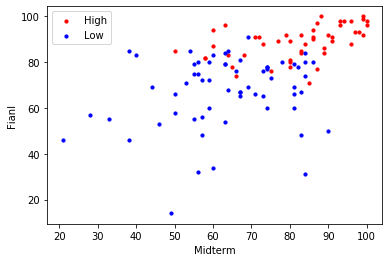

In [20]:
plt.scatter(X_h[:,0],X_h[:,1],c="r",marker="o", s=10)
plt.scatter(X_l[:,0],X_l[:,1],c="b",marker="o", s=10)

plt.xlabel("Midterm")
plt.ylabel("Fianl")
plt.legend(["High","Low"],loc=0)

In [21]:
high , low = (t==1), (t==0)

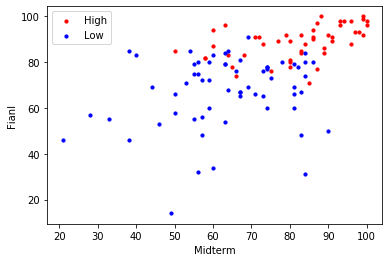

In [22]:
plt.scatter(X[high,0],X[high,1],c="r",marker="o",s=10)
plt.scatter(X[low,0],X[low,1],c="b",marker="o",s=10)

plt.xlabel("Midterm")
plt.ylabel("Fianl")
plt.legend(["High","Low"],loc=0)

### Applying Newton's Method

In [23]:
n=len(t)
new_col=np.ones((n,1))
X=np.append(X,new_col,1)

In [24]:
nf=2 # number of features
w=np.zeros(nf+1) # initial weights
iter_num=10 

In [25]:
for i in range (0,iter_num):
    y=np.array(sigmoid(X@w))
    R=np.diag(y*(1-y))
    
    w1=X.T@R@X
    w2=np.linalg.inv(w1)
    w3=X.T@(y-t)
    w=w-w2@w3
    print(w, "\n")


[ 0.03188931  0.06146783 -7.25018839] 

[  0.04757266   0.12178934 -13.32933715] 

[  0.05913424   0.18381012 -19.23744654] 

[  0.06622808   0.2253133  -23.12692142] 

[  0.06835078   0.23770912 -24.28352366] 

[  0.06849556   0.2385381  -24.36081727] 

[  0.06849617   0.23854149 -24.36113369] 

[  0.06849617   0.23854149 -24.3611337 ] 

[  0.06849617   0.23854149 -24.3611337 ] 

[  0.06849617   0.23854149 -24.3611337 ] 



In [26]:
def decision_2(x1,x2):
    return sigmoid(w[0]*x1+w[1]*x2+w[2])

In [27]:
print(decision_2(97,89))

0.971060660915041


### Plotting the decision boundary

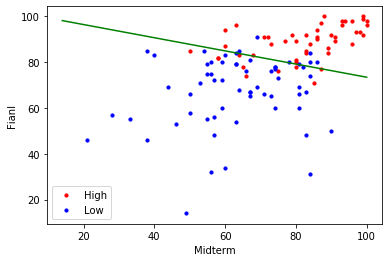

In [29]:
high , low = (t==1), (t==0)
plt.scatter(X[high,0],X[high,1],c="r",marker="o",s=10)
plt.scatter(X[low,0],X[low,1],c="b",marker="o",s=10)

plt.xlabel("Midterm")
plt.ylabel("Fianl")
plt.legend(["High","Low"],loc=0)

x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(w[0]*x_value+w[2])/w[1]
plt.plot(x_value,y_value, "g")


### Predictions and Accuracy

In [30]:
y_pred=(sigmoid(X@w).round())

In [31]:
y_pred

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0.])

In [32]:
print("Train Accuracy:", sum(t==y_pred)*100/110,"%")

Train Accuracy: 84.54545454545455 %


## Titanic

The data is adapted from that available at

https://www.kaggle.com/heptapod/titanic

### Loading Data

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [34]:
df=pd.read_csv("../data/titanic-1.csv",header=None)
X=df.iloc[:,:-1].values
t=df.iloc[:,-1].values

In [35]:
df.head()

,0,1,2
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [36]:
df.describe()

,0,1,2
count,1309.000000,1309.000000,1309.000000
mean,29.503186,33.281086,0.261268
std,12.905241,51.741500,0.439494
min,0.170000,0.000000,0.000000
25%,22.000000,7.895800,0.000000
50%,28.000000,14.454200,0.000000
75%,35.000000,31.275000,1.000000
max,80.000000,512.329200,1.000000


### Built-in Classifier

In [37]:
clf = LogisticRegression(random_state=1,solver='lbfgs').fit(X, t)
clf.score(X,t)

0.7333842627960275

### Plotting of Data

In [38]:
surv , fail = (t==1), (t==0)

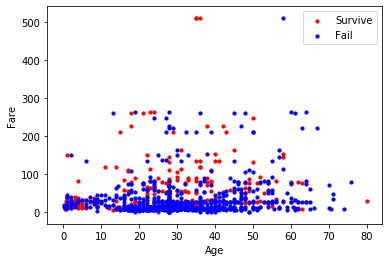

In [40]:
plt.scatter(X[surv,0],X[surv,1],c="r",marker="o",s=10)
plt.scatter(X[fail,0],X[fail,1],c="b",marker="o",s=10)

plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(["Survive","Fail"],loc=0)


### Applying Newton's Method

In [41]:
n=len(t)
new_col=np.ones((n,1))
X=np.append(X,new_col,1)

In [44]:
nf=2 # number of features
w=np.zeros(nf+1) # initial weights
iter_num=10

In [45]:
for i in range (0,iter_num):
    y=np.array(sigmoid(X@w))
    R=np.diag(y*(1-y))
    
    w1=X.T@R@X
    w2=np.linalg.inv(w1)
    w3=X.T@(y-t)
    w=w-w2@w3
    print(w, "\n")


[-0.01221559  0.00644746 -0.80910715] 

[-0.01598901  0.00765168 -0.8441549 ] 

[-0.01625245  0.00771614 -0.84264754] 

[-0.01625321  0.00771631 -0.84263911] 

[-0.01625321  0.00771631 -0.84263911] 

[-0.01625321  0.00771631 -0.84263911] 

[-0.01625321  0.00771631 -0.84263911] 

[-0.01625321  0.00771631 -0.84263911] 

[-0.01625321  0.00771631 -0.84263911] 

[-0.01625321  0.00771631 -0.84263911] 



In [46]:
def decision_2(x1,x2):
    return sigmoid(w[0]*x1+w[1]*x2+w[2])

In [47]:
print(decision_2(30,7))

0.21819413269224372


### Plotting the decision boundary

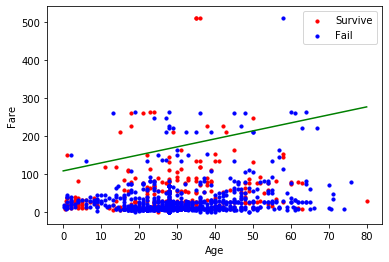

In [53]:
surv , fail = (t==1), (t==0)
plt.scatter(X[surv,0],X[surv,1],c="r",marker="o",s=10)
plt.scatter(X[fail,0],X[fail,1],c="b",marker="o",s=10)

plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(["Survive","Fail"],loc=0)

x_value= np.array([0,80])
y_value=-(w[0]*x_value+w[2])/w[1]
plt.plot(x_value,y_value, "g")


### Predictions and Accuracy

In [50]:
y_pred=(sigmoid(X@w).round())

In [51]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
print("Train Accuracy:", sum(t==y_pred)*100/n,"%")

Train Accuracy: 73.33842627960276 %
